In [1]:
def insta_searching(word):
    url = "https://www.instagram.com/explore/tags/" + word
    return url

In [2]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import time # 검색결과 나오기까지 기다리기 위함

driver = webdriver.Chrome(r'C:\Users\student\Documents\playdata\chromedriver.exe')
driver.get('https://www.instagram.com/accounts/login/')
time.sleep(2)

C:\Users\MINJI\AppData\Local\Temp\ipykernel_1508\556128914.py:5: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(r'C:\Users\student\Documents\playdata\chromedriver.exe')


In [3]:
word = "제주도맛집"
url = insta_searching(word)
driver.get(url)

In [5]:
def select_first(driver):
    first = driver.find_element(By.CLASS_NAME, '_aagu')
    first.click()
    time.sleep(3)
select_first(driver)

In [7]:
import re
from bs4 import BeautifulSoup

In [8]:
def get_content(driver):
    html = driver.page_source
    soup = BeautifulSoup(html, 'lxml')
    #     본문내용
    try:
        content = soup.select('div._a9zs > h1')[0].text
    except:
        content = ' '
    # 태그
    tags = re.findall(r'#[^\s\<]+', content)
    # 날짜정보
    date = soup.select('time._aaqe')[0]['datetime'][:10]
    # 좋아요 수
    try:
        like = soup.select('div._ae2s._ae3v._ae3w > section._ae5m._ae5n._ae5o > div > div > span > a > span > span')[0].text
    except:
        like = 0
    # 장소정보
    try:
        place = soup.select('div._aaqm')[0].text
    except:
        place = ''
    
    data = [content, date, like, place, tags]
    return data
get_content(driver)

['광고가성비 좋은 #애월맛집 랍스터 요리 전문점랍스터빈!!🔸주소 : 제주시 애월읍 애월해안로 752🔸영업 : 오전11시~오후10시🔸전화: 064-743-1979🔸매주 수요일 휴무@lobstervin #애월맛집추천 #애월카페 #애월읍맛집 #제주애월맛집 #제주도맛집 #제주맛집#제주카페 #외도맛집 #하귀맛집#한림맛집 #한림카페 #애월해안도로맛집#애월가볼만한곳 #제주공항맛집 #제주데이트 #제주공항근처맛집 #한담맛집 #제주해안도로#제주맛집추천 #제주도맛집추천 #제주도민맛집',
 '2023-04-04',
 0,
 '',
 ['#애월맛집',
  '#애월맛집추천',
  '#애월카페',
  '#애월읍맛집',
  '#제주애월맛집',
  '#제주도맛집',
  '#제주맛집#제주카페',
  '#외도맛집',
  '#하귀맛집#한림맛집',
  '#한림카페',
  '#애월해안도로맛집#애월가볼만한곳',
  '#제주공항맛집',
  '#제주데이트',
  '#제주공항근처맛집',
  '#한담맛집',
  '#제주해안도로#제주맛집추천',
  '#제주도맛집추천',
  '#제주도민맛집']]

In [22]:
def move_next(driver):
    right = driver.find_element(By.CLASS_NAME, '_aaqg')
    right.click()
    time.sleep(3)
move_next(driver)

In [52]:
word = "제주데이트"
url = insta_searching(word)

In [53]:
driver.get(url)
time.sleep(3)

In [54]:
select_first(driver)

In [55]:
results = []
target = 100
for i in range(target):
    try:
        data = get_content(driver)
        results.append(data)
        move_next(driver)
    except:
        time.sleep(2)
        move_next(driver)
print(results[:2])

[['비주얼 폭발하는 제주 수제 케이크집이야😉인플루언서들이 기념일 때 여기서 케이크 필수로 사감💖 맛도 폭발! 비주얼도 폭발!🥰@@케이크 폼 미쳤는데??+)제주 브와두스야🍰#제주도빵집 #제주도베이커리 #제주데이트 #연동카페 #제주빵집', '2023-04-03', '332', '', ['#제주도빵집', '#제주도베이커리', '#제주데이트', '#연동카페', '#제주빵집']], ['제주도 가면 방문1번지로 찍고 움직여야할 동문시장 디저트맛집이다.아이스크림으로 제주통합짱이라 말해도 과언이 아니다. 육지에선 쉽게 만날수 없는 소금빵아이스크림으로 단짠단짠한 맛을 쫄깃함과 함께 느낄수 있다니ㅠ 현재 제주도가면 인스타 인증 필찾 방문코스로 낙인찍혀버린 디저트 종합선물세트 제작소인 #솔브레 맛에 대한 논란을 종결시키러 스푸파가 왔다. 부드럽고 달달하니 입속에서 사르르 녹아내리는 우유눈꽃같은 맛에 갓구운 소금빵이 함께 만나 찍먹하는 순간 이 아이스크림말고 다른 아이스크림 못먹을 정도다. 지금도 자꾸 생각나는 이맛은 어쩌지...소금빵부터 도넛, 그리고 솔브레의 시그니처메뉴인 소금빵아이스크림까지 맛의 깊음을 느낄수 있는 이곳. 빈틈을 찾아볼수 없는 도넛부터 개성넘치는 소금빵까지 다양한 디저트를 판매하 사진으로도 너무 이뿐데 실물은 또 얼마나 깡패일까❤️ 제주도가면 재방문 1번지가 이곳이라구~🥰🥰[🤷스푸파의 종합 게시판🤷]\xa0✅🌸솔브레 메뉴판🌸📒가게 주소 : 제주 제주시 일도1동 동문로 10 1층 솔브레📒가게 영업시간 : 10:00~19:00📒솔브레 인스타 : @solbre_jejufghj @@솔브레로 한번 녹아볼래?\U0001fae0\U0001fae0#소금빵 #아이스크림 #제주카페 #제주카페추천 #제주맛집 #제주맛집추천 #제주빵지순례 #동문시장 #동문시장맛집 #kfood #제주데이트코스 #제주데이트 #제주가볼만한곳', '2023-03-30', '847', '제주도', ['#솔브레', '#소금빵', '#아이스크림', '#제주카페', '#제주카페추천', '#제주맛집', '#제주맛

In [33]:
# print(results[:5])

[['광고) 진심으로 추천해주고 싶은활어회맛집 "노형수산시장"서울의 노량진수산시장이 있다면제주도엔 노형수산시장이 있다!!제주도에서 가장큰 규모의 횟집👍제주도에서 가장 저렴한 횟집👍활어회부터 해산물,대게,구이류까지모든 바다의맛이 한곳에!😍밤에는 포장마차 감성의 야외테라스에서 즐길수있고❤깔끔한 포장으로 언제어디서나즐길수 있는~🥂오늘은 이곳에서 소주각Go👉👉🧭노형수산시장주소 : 제주 제주시 한라대학로 7전화 : 064-745-8822영업시간 : 매일 14:00 ~ 새벽 02:00  새벽 01:00 라스트오더#제주도맛집#제주맛집#제주공항근처횟집#제주횟집#제주도횟집#제주시횟집#제주회포장#제주도회포장#제주횟집추천#노형동맛집#연동맛집#드림타워맛집#이호테우해변맛집', '2023-04-03', 0, '', ['#제주도맛집#제주맛집#제주공항근처횟집#제주횟집#제주도횟집#제주시횟집#제주회포장#제주도회포장#제주횟집추천#노형동맛집#연동맛집#드림타워맛집#이호테우해변맛집']], ['광고) 진심으로 추천해주고 싶은활어회맛집 "노형수산시장"서울의 노량진수산시장이 있다면제주도엔 노형수산시장이 있다!!제주도에서 가장큰 규모의 횟집👍제주도에서 가장 저렴한 횟집👍활어회부터 해산물,대게,구이류까지모든 바다의맛이 한곳에!😍밤에는 포장마차 감성의 야외테라스에서 즐길수있고❤깔끔한 포장으로 언제어디서나즐길수 있는~🥂오늘은 이곳에서 소주각Go👉👉🧭노형수산시장주소 : 제주 제주시 한라대학로 7전화 : 064-745-8822영업시간 : 매일 14:00 ~ 새벽 02:00  새벽 01:00 라스트오더#제주도맛집#제주맛집#제주공항근처횟집#제주횟집#제주도횟집#제주시횟집#제주회포장#제주도회포장#제주횟집추천#노형동맛집#연동맛집#드림타워맛집#이호테우해변맛집', '2023-04-03', 0, '', ['#제주도맛집#제주맛집#제주공항근처횟집#제주횟집#제주도횟집#제주시횟집#제주회포장#제주도회포장#제주횟집추천#노형동맛집#연동맛집#드림타워맛집#이호테우해변맛집']], ['광고) 진심으로 추천해주고 싶은활어회맛집 "노형수산시장"서울의 

In [9]:
import pandas as pd

In [56]:
results_df = pd.DataFrame(results)
results_df.columns = ['content','data','like','place','tags']
results_df.to_excel('./files/crawling_jejuDate.xlsx', index=False)

In [57]:
jeju_insta_df = pd.DataFrame([])
folder = './files/'
f_list = ['crawling_jejuMatJip.xlsx','crawling_jejuMatJip2.xlsx','crawling_jejuMatJip3.xlsx','crawling_jejuCafe.xlsx','crawling_jejuDate.xlsx']
for fname in f_list:
    fpath = folder + fname
    temp = pd.read_excel(fpath)
    jeju_insta_df = jeju_insta_df.append(temp)

jeju_insta_df.columns = ['content','date','like','place','tags']
jeju_insta_df.drop_duplicates(subset=["content"], inplace=True)
jeju_insta_df.to_excel('./files/crawling_jeju.xlsx', index=False)

C:\Users\student\AppData\Local\Temp\ipykernel_6808\4140988707.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  jeju_insta_df = jeju_insta_df.append(temp)
C:\Users\student\AppData\Local\Temp\ipykernel_6808\4140988707.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  jeju_insta_df = jeju_insta_df.append(temp)
C:\Users\student\AppData\Local\Temp\ipykernel_6808\4140988707.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  jeju_insta_df = jeju_insta_df.append(temp)
C:\Users\student\AppData\Local\Temp\ipykernel_6808\4140988707.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  jeju_insta_df = jeju_insta_df.append(temp)
C:\Users\student

In [59]:
jeju_insta_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 280 entries, 0 to 99
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  280 non-null    object
 1   date     280 non-null    object
 2   like     280 non-null    int64 
 3   place    110 non-null    object
 4   tags     280 non-null    object
dtypes: int64(1), object(4)
memory usage: 13.1+ KB


In [13]:
raw_total = pd.read_excel('./files/crawling_jeju.xlsx')
raw_total['tags'][:3]

0    ['#제주도맛집#제주맛집#제주공항근처횟집#제주횟집#제주도횟집#제주시횟집#제주회포장#...
1    ['#제주공항근처맛집', '#제주공항근처맛집', '#제주맛집', '#제주시맛집', ...
2    ['#반영구입술#아마존베스트셀러#출근', '#초등부#초코크로와상#대바늘#어젯밤🎗#애...
Name: tags, dtype: object

In [65]:
tags_total = []
for tags in raw_total['tags']:
    tags_list = tags[2:-2].split("', '")    
    for tag in tags_list:
        tags_total.append(tag)

In [15]:
tags_total[:20]

['#제주도맛집#제주맛집#제주공항근처횟집#제주횟집#제주도횟집#제주시횟집#제주회포장#제주도회포장#제주횟집추천#노형동맛집#연동맛집#드림타워맛집#이호테우해변맛집',
 '#제주공항근처맛집',
 '#제주공항근처맛집',
 '#제주맛집',
 '#제주시맛집',
 '#제주도맛집',
 '#용담동맛집',
 '#제주가볼만한곳',
 '#제주데이트',
 '#제주여행',
 '#제주핫플',
 '#제주도가볼만한곳',
 '#제주도데이트',
 '#제주도여행',
 '#제주도핫플',
 '#반영구입술#아마존베스트셀러#출근',
 '#초등부#초코크로와상#대바늘#어젯밤🎗#애월#동명동핫플#정읍#어제도#아기스타그램#도시락#어린이집간식',
 '#노후#일러스트#출산탈모#제주도맛집#학하동',
 '#맨투맨♎#구월동눈썹문신#공릉동맛집#기념일케이크',
 '#코스🍒#부케💪#덕스타그램#디지털펌#피부관리⚽#혜화#시청']

In [58]:
from collections import Counter

In [66]:
tag_counts = Counter(tags_total)

In [67]:
tag_counts.most_common(100)

[('', 67),
 ('#제주맛집', 55),
 ('#제주여행', 53),
 ('#제주데이트', 40),
 ('#제주도맛집', 39),
 ('#제주카페', 33),
 ('#제주가볼만한곳', 27),
 ('#제주도', 23),
 ('#제주공항근처맛집', 22),
 ('#서귀포맛집', 22),
 ('#제주도여행', 21),
 ('#제주핫플', 20),
 ('#제주시맛집', 17),
 ('#제주도카페', 17),
 ('#애월맛집', 16),
 ('#제주', 16),
 ('#제주현지인맛집', 16),
 ('#제주카페추천', 16),
 ('#제주도민맛집', 15),
 ('#제주여행코스', 15),
 ('#제주도데이트', 14),
 ('#제주맛집추천', 13),
 ('#서귀포카페', 13),
 ('#제주데이트코스', 13),
 ('#제주공항맛집', 12),
 ('#중문맛집', 11),
 ('#제주핫플레이스', 11),
 ('#제주도가볼만한곳', 9),
 ('#애월카페', 9),
 ('#제주도맛집추천', 9),
 ('#제주숙소', 9),
 ('#제주도핫플', 8),
 ('#제주도여행코스', 8),
 ('#맞팔', 8),
 ('#서귀포데이트', 8),
 ('#협재맛집', 7),
 ('#맛집', 7),
 ('#제주도카페추천', 7),
 ('#제주펜션', 7),
 ('#서귀포핫플', 7),
 ('#먹방', 6),
 ('#먹팔', 6),
 ('#제주살이', 6),
 ('#일상', 6),
 ('#제주신상카페', 6),
 ('#연동맛집', 6),
 ('#제주공항근처', 6),
 ('#제주공항근처횟집', 6),
 ('#여행', 6),
 ('#좋아요', 6),
 ('#제주여행추천', 6),
 ('#제주포토존', 6),
 ('#제주흑돼지맛집', 5),
 ('#제주중문맛집', 5),
 ('#제주애월맛집', 5),
 ('#제주혼밥', 5),
 ('#데일리', 5),
 ('#제주공항', 5),
 ('#한림카페', 5),
 ('#팔로우', 5),
 ('#좋반', 5),
 ('#서귀포카페추천',

In [68]:
STOPWORDS = ['', '#일상','#맞팔','#먹팔맞팔','#울산맛집','#ootd','#fff'\
            , '#먹스타','#먹스타맞팔','#좋반','#소통','#제주포토존'\
            ,'#먹방','#먹팔','#좋아요','#제주펜션','#데일리','#제주숙소'\
            ,'#팔로우']
tag_total_selected = []
for tag in tags_total:
    if tag not in STOPWORDS:
        tag_total_selected.append(tag)
tag_counts_selected = Counter(tag_total_selected)
tag_counts_selected.most_common(50)

[('#제주맛집', 55),
 ('#제주여행', 53),
 ('#제주데이트', 40),
 ('#제주도맛집', 39),
 ('#제주카페', 33),
 ('#제주가볼만한곳', 27),
 ('#제주도', 23),
 ('#제주공항근처맛집', 22),
 ('#서귀포맛집', 22),
 ('#제주도여행', 21),
 ('#제주핫플', 20),
 ('#제주시맛집', 17),
 ('#제주도카페', 17),
 ('#애월맛집', 16),
 ('#제주', 16),
 ('#제주현지인맛집', 16),
 ('#제주카페추천', 16),
 ('#제주도민맛집', 15),
 ('#제주여행코스', 15),
 ('#제주도데이트', 14),
 ('#제주맛집추천', 13),
 ('#서귀포카페', 13),
 ('#제주데이트코스', 13),
 ('#제주공항맛집', 12),
 ('#중문맛집', 11),
 ('#제주핫플레이스', 11),
 ('#제주도가볼만한곳', 9),
 ('#애월카페', 9),
 ('#제주도맛집추천', 9),
 ('#제주도핫플', 8),
 ('#제주도여행코스', 8),
 ('#서귀포데이트', 8),
 ('#협재맛집', 7),
 ('#맛집', 7),
 ('#제주도카페추천', 7),
 ('#서귀포핫플', 7),
 ('#제주살이', 6),
 ('#제주신상카페', 6),
 ('#연동맛집', 6),
 ('#제주공항근처', 6),
 ('#제주공항근처횟집', 6),
 ('#여행', 6),
 ('#제주여행추천', 6),
 ('#제주흑돼지맛집', 5),
 ('#제주중문맛집', 5),
 ('#제주애월맛집', 5),
 ('#제주혼밥', 5),
 ('#제주공항', 5),
 ('#한림카페', 5),
 ('#서귀포카페추천', 5)]

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
import sys

if sys.platform in ["win32", "win64"]:
    font_name = "malgun gothic"
elif sys.platform == "darwin":
    font_name = "AppleGothic"

rc('font',family=font_name)

In [70]:
tag_counts_df = pd.DataFrame(tag_counts_selected.most_common(30))
tag_counts_df.columns = ['tags','counts']

<Axes: xlabel='counts', ylabel='tags'>

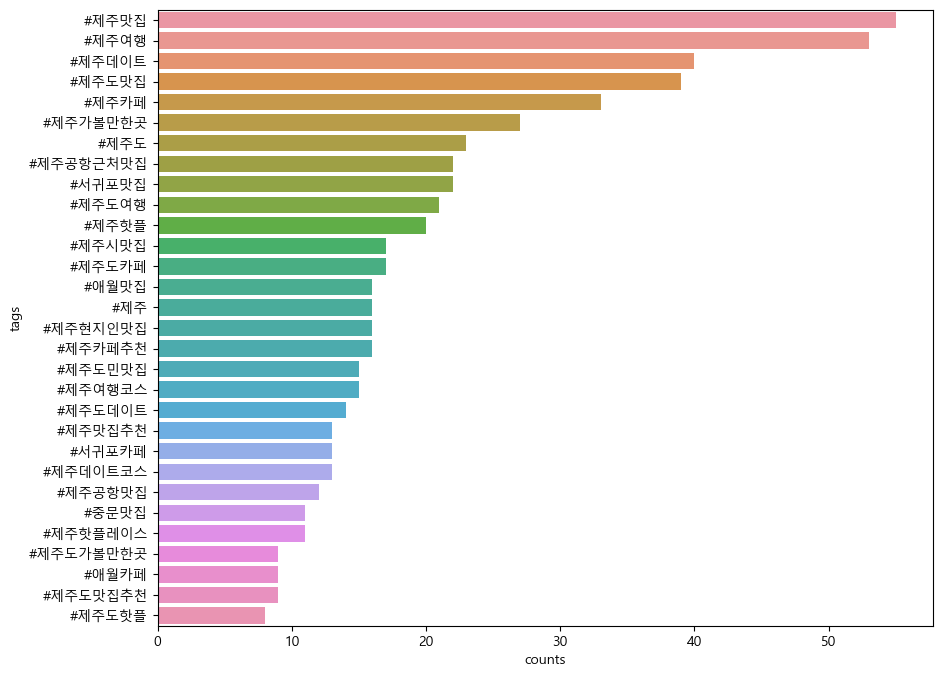

In [71]:
plt.figure(figsize=(10,8))
sns.barplot(x='counts',y='tags', data=tag_counts_df)

In [72]:
from wordcloud import WordCloud
import platform

In [73]:
!pip install wordcloud

In [74]:
if platform.system() == 'Windows':   #윈도우의 경우
    font_path = "c:/Windows/Fonts/malgun.ttf"
elif platform.system() == "Darwin":   #Mac 의 경우
    font_path = "/Users/$USER/Library/Fonts/AppleGothic.ttf"

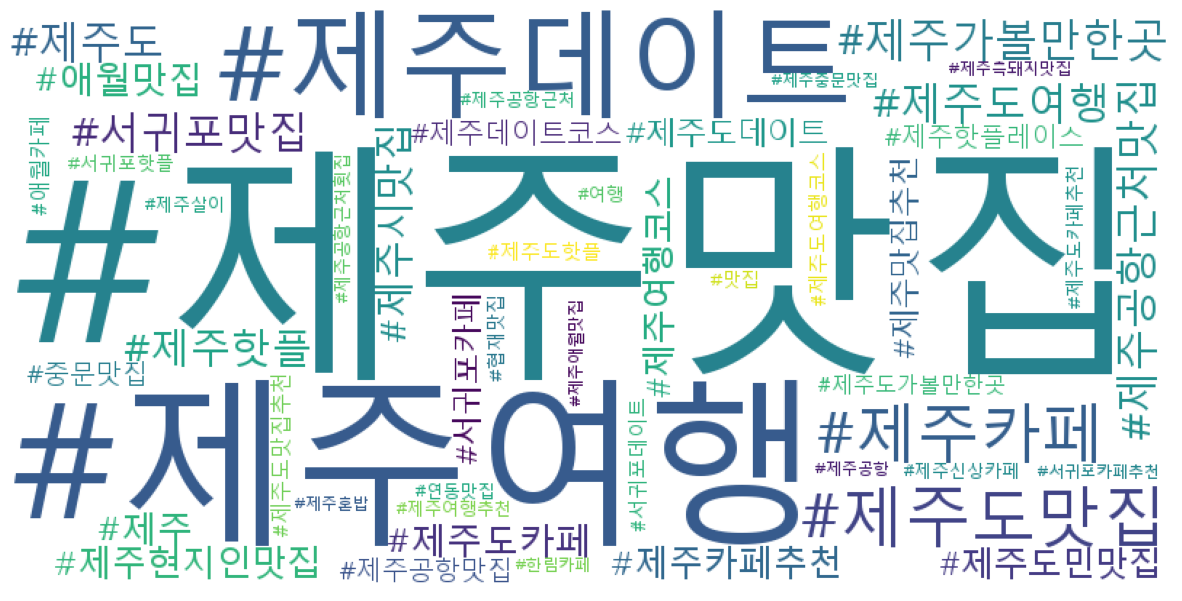

In [83]:
wordcloud=WordCloud(font_path= font_path,	# 사용할 글꼴 경로 
                    background_color="white",	# 배경색
                    max_words=50,		# 최대 몇 개의 단어를 나타낼 것인지 설정
                    relative_scaling= 0.3, 	# 워드 클라우드 내 글자들의 상대적인 크기(0~1). 글자 간 여백 개념
                    width = 800,		# 워드클라우드 가로
                    height = 400		# 워드클라우드 세로
                 ).generate_from_frequencies(tag_counts_selected)  
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud)
plt.axis('off') # 시각화 도구로만 쓸거라서 x축, y축 없앰
plt.savefig('./files/tag-wordcloud.png')

In [85]:
raw_total.head()

,content,data,like,place,tags
0,"광고) 진심으로 추천해주고 싶은활어회맛집 ""노형수산시장""서울의 노량진수산시장이 있다...",2023-04-03,0,NaN,['#제주도맛집#제주맛집#제주공항근처횟집#제주횟집#제주도횟집#제주시횟집#제주회포장#...
1,제주도 대표! 보말칼국수 보증맛집 남순이네!*남순이네국수제주에서 맛집 찾으시는분들은...,2023-04-04,0,NaN,"['#제주공항근처맛집', '#제주공항근처맛집', '#제주맛집', '#제주시맛집', ..."
2,남편이랑 쇼핑하면서 인증샷 ^^ 제가 사준선물#반영구입술#아마존베스트셀러#출근 #초...,2023-04-04,0,NaN,"['#반영구입술#아마존베스트셀러#출근', '#초등부#초코크로와상#대바늘#어젯밤🎗#애..."
3,(광고)제주돈아_고내점바다 보면서 흑돼지먹을수 있다공!!!!!!이게 제주도 감성이지...,2023-04-04,0,NaN,"['#애월맛집', '#애월흑돼지', '#애월해안도로맛집', '#애월흑돼지맛집', '..."
4,[ 기쁨이네해물탕앤돌솥밥 ]전날 술을 많이 먹어서 해장하러 방문한 해물탕집!둘이 먹...,2023-04-04,7,함덕해수욕장,"['#제주', '#제주도', '#함덕해수욕장', '#제주맛집', '#제주도맛집', ..."


In [21]:
location_counts = raw_total['place'].value_counts()
location_counts

제주도 제주              21
제주도                  8
Jeju-do              4
퍼플모스 Purple Moss     3
루페이퍼 Rupaper         2
                    ..
애월                   1
제주에인감귤밭              1
니모메빈티지라운지            1
초록달과자점               1
삼성혈                  1
Name: place, Length: 75, dtype: int64

In [86]:
location_counts_df = pd.DataFrame(location_counts)
location_counts_df.head()

,place
제주도 제주,21
제주도,8
Jeju-do,4
퍼플모스 Purple Moss,3
루페이퍼 Rupaper,2


In [87]:
location_counts_df.to_excel('./files/location_counts.xlsx')

In [88]:
locations=list(location_counts.index)
locations

['제주도 제주',
 '제주도',
 'Jeju-do',
 '퍼플모스 Purple Moss',
 '루페이퍼 Rupaper',
 '환상의 섬 Jeju Island',
 '제주도 제주시',
 '제주도 서귀포',
 '제주도 Jeju Island',
 '노턴',
 'Baalamb In Jeju',
 '여누카페',
 '위즈커피',
 '제주참숯가마',
 '보롬왓',
 '골목커피',
 '비밀의숲',
 '애월읍 장전리',
 '불광천',
 '레이오버 제주',
 'One and only - 원앤온리 제주',
 '레크레_recre',
 '바닐라파레트',
 '조천읍 와흘리',
 '함덕해수욕장',
 '대흘리',
 '카페 노티드 제주 애월 - Cafe Knotted Jeju Aewol',
 '제주신라면세점',
 '너럭',
 '제주도 중문',
 '제주 구좌읍 세화리',
 'Amber Purehill Hotels&Resorts',
 '오지하우스:호주식당',
 '제주도 제주시 노형동',
 '건강과 성 박물관',
 '제주도애월해안로',
 '손방둥이 공방',
 '오션갤러리 호텔앤리조트',
 '제주 함덕 서우봉 해변',
 'Sinchang Windmill Coastal Road',
 '카페도도다',
 '카페코지 Cafe Coji',
 '카페 마노르블랑 제주',
 '브라보비치',
 '이월드 (E-WORLD)',
 '맛집탐방',
 '성읍탐라식당',
 'Jeju Island,Korea',
 '제주신화월드',
 'Naive Silhouette - 나이브실루엣',
 '금능해수욕장',
 '묵전 제주',
 '동백포레스트',
 '닭머르',
 '별방진',
 '제주도 한경면',
 '석 인 장 碩 仁 張',
 '제주여행',
 'Palgil',
 '제주시 조천읍 와산리',
 '서귀포올레시장',
 '제주도제주시 삼화지구',
 '숙성도',
 '제주도 애월읍',
 '이층빵집 굽는아방',
 '사이카레',
 '서귀포 쌍둥이 횟집',
 '옹포리',
 '키친요디2호관',
 'wiee.jeju',
 '애월',
 '제주에인감귤밭',


In [25]:
import requests

In [26]:
searching = '합정 스타벅스'
url = 'https://dapi.kakao.com/v2/local/search/keyword.json?query={}'.format(searching)
headers = {
    "Authorization": "KakaoAK 404cb49deae7305825cfb4e4eebe09c7"
}

places = requests.get(url, headers = headers).json()['documents']
places

[{'address_name': '서울 마포구 합정동 472',
  'category_group_code': 'CE7',
  'category_group_name': '카페',
  'category_name': '음식점 > 카페 > 커피전문점 > 스타벅스',
  'distance': '',
  'id': '2057327896',
  'phone': '1522-3232',
  'place_name': '스타벅스 합정점',
  'place_url': 'http://place.map.kakao.com/2057327896',
  'road_address_name': '서울 마포구 월드컵로1길 14',
  'x': '126.91253700818196',
  'y': '37.54994959743763'},
 {'address_name': '서울 마포구 합정동 473',
  'category_group_code': 'CE7',
  'category_group_name': '카페',
  'category_name': '음식점 > 카페 > 커피전문점 > 스타벅스',
  'distance': '',
  'id': '2132676511',
  'phone': '1522-3232',
  'place_name': '스타벅스 합정푸르지오점',
  'place_url': 'http://place.map.kakao.com/2132676511',
  'road_address_name': '서울 마포구 월드컵로3길 14',
  'x': '126.91247704039314',
  'y': '37.550909116022105'},
 {'address_name': '서울 마포구 서교동 490',
  'category_group_code': 'CE7',
  'category_group_name': '카페',
  'category_name': '음식점 > 카페 > 커피전문점 > 스타벅스',
  'distance': '',
  'id': '288597324',
  'phone': '1522-3232',

In [89]:
def find_places(searching):
    url = 'https://dapi.kakao.com/v2/local/search/keyword.json?query={}'.format(searching)
    headers = {
        "Authorization": "KakaoAK 287b9af14aac4f4147734615186fe2ca"
    } 
    places = requests.get(url, headers = headers).json()['documents']
    place = places[0]

    name = place['place_name']
    x = place['x']
    y = place['y']
    phone = place['phone']
    data = [name, x, y, phone, searching]
    return data

In [90]:
from tqdm import tqdm_notebook

In [91]:
import time
locations_inform = []
for location in tqdm_notebook(locations):
    try:
        data = find_places(location)
        locations_inform.append(data)
        time.sleep(0.5)
    except:
        pass
locations_inform

C:\Users\MINJI\AppData\Local\Temp\ipykernel_1508\60451310.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for location in tqdm_notebook(locations):


  0%|          | 0/75 [00:00<?, ?it/s]

[['제주도', '126.54587355630036', '33.379777816446165', '', '제주도 제주'],
 ['제주도', '126.54587355630036', '33.379777816446165', '', '제주도'],
 ['올레길 18코스(제주원도심-조천 올레)',
  '126.58214303914238',
  '33.52522810308715',
  '',
  '제주도 제주시'],
 ['올레길 7코스(서귀포-월평 올레)',
  '126.51530966206293',
  '33.23738579332568',
  '',
  '제주도 서귀포'],
 ['제주도', '126.54587355630036', '33.379777816446165', '', '제주도 Jeju Island'],
 ['노턴', '127.48756687650614', '36.63793879189138', '', '노턴'],
 ['여누카페', '126.673670981413', '33.4322161409169', '064-783-7171', '여누카페'],
 ['위즈커피', '126.432128534267', '33.4874749915111', '010-4434-6655', '위즈커피'],
 ['제주참숯가마찜질방',
  '126.86341600718973',
  '33.369142317425506',
  '064-783-0756',
  '제주참숯가마'],
 ['보롬왓', '126.75249576943', '33.4134970849722', '', '보롬왓'],
 ['골목커피', '126.373756993927', '34.8035129331836', '010-2450-2088', '골목커피'],
 ['비밀의숲', '126.75493209633262', '33.45360917744684', '', '비밀의숲'],
 ['왕벚꽃거리', '126.383825919428', '33.4521219667359', '', '애월읍 장전리'],
 ['불광천', '126.906234509821', 

In [92]:
locations_inform_df = pd.DataFrame(locations_inform)
locations_inform_df.columns = ['name_official', '경도','위도','전화번호','인스타위치명']
locations_inform_df.to_excel('./files/locations.xlsx', index=False)

In [93]:
location_counts_df = pd.read_excel('./files/location_counts.xlsx', index_col = 0)
location_inform_df = pd.read_excel('./files/locations.xlsx')

In [94]:
location_inform_df

,name_official,경도,위도,전화번호,인스타위치명
0,제주도,126.545874,33.379778,NaN,제주도 제주
1,제주도,126.545874,33.379778,NaN,제주도
2,올레길 18코스(제주원도심-조천 올레),126.582143,33.525228,NaN,제주도 제주시
3,올레길 7코스(서귀포-월평 올레),126.515310,33.237386,NaN,제주도 서귀포
4,제주도,126.545874,33.379778,NaN,제주도 Jeju Island
...,...,...,...,...,...
56,올레길 16코스(고내-광령 올레),126.389796,33.466498,NaN,애월
57,제주에인감귤밭,126.539014,33.256561,NaN,제주에인감귤밭
58,니모메,126.430921,33.493701,064-742-3008,니모메빈티지라운지
59,초록달과자점,126.330382,33.435914,064-799-1503,초록달과자점


In [95]:
location_data = pd.merge(locations_inform_df, location_counts_df,
                        how='inner', left_on='name_official', right_index=True)
location_data.head()
# location_data = location_data.reset_index()

,name_official,경도,위도,전화번호,인스타위치명,place
0,제주도,126.54587355630036,33.379777816446165,,제주도 제주,8
1,제주도,126.54587355630036,33.379777816446165,,제주도,8
4,제주도,126.54587355630036,33.379777816446165,,제주도 Jeju Island,8
5,노턴,127.48756687650614,36.63793879189138,,노턴,2
6,여누카페,126.673670981413,33.4322161409169,064-783-7171,여누카페,1


In [98]:
location_data = location_data.pivot_table(index=['name_official','경도','위도'], values='place', aggfunc='sum') # 같은 곳은 합치겠다
location_data.head(20)

,,,place
name_official,경도,위도,
골목커피,126.373756993927,34.8035129331836,1
금능해수욕장,126.235889902253,33.3904488156321,1
너럭,126.508813679489,33.5161973720611,1
노턴,127.48756687650614,36.63793879189138,2
닭머르,126.61189693619232,33.53647489410832,1
동백포레스트,126.63619814081831,33.300308154725585,1
바닐라파레트,126.480579828486,33.4771172717429,1
별방진,126.882898730735,33.5267719838211,1
보롬왓,126.75249576943,33.4134970849722,1


In [99]:
location_data = location_data.reset_index()

In [100]:
location_data.to_excel('./files/location_inform.xlsx')

In [38]:
!pip install folium

  Using cached folium-0.14.0-py2.py3-none-any.whl (102 kB)
  Using cached branca-0.6.0-py3-none-any.whl (24 kB)


In [101]:
import folium

In [108]:
Mt_Hanla = [33.362500, 126.533694]
map_jeju = folium.Map(location=Mt_Hanla, zoom_start=11)

In [109]:
for i in range(len(location_data)):
    name = location_data['name_official'][i]
    count = location_data['place'][i]
    size = int(count)*2
    long = float(location_data['위도'][i])
    lat = float(location_data['경도'][i])
    folium.CircleMarker((long,lat), radius=size, color='red', popup=name).add_to(map_jeju)

map_jeju

In [110]:
map_jeju.save('./files/jeju.html')

In [111]:
from folium.plugins import MarkerCluster

In [116]:
locations = []
names = []

for i in range(len(location_data)):
    data = location_data.iloc[i]
    locations.append((float(data['위도']), float(data['경도'])))
    names.append(data['name_official'])


icon_create_function = """\
    function(cluster){
        return L.divIcon({
        html:'<b>' + cluster.getChildCount() + '</b>',
        className: 'marker-cluster marker-cluster-large',
        iconsize: new L.Point(30,30)
        });
    }
"""

In [117]:
Mt_Hanla = [33.362500, 126.533694]
map_jeju2 = folium.Map(location=Mt_Hanla, zoom_start=11)

In [121]:
marker_cluster = MarkerCluster(
    locations = locations, 
    popups = names,
    name = 'Jeju',
    overlay = True,
    control = True,
    icon_create_function = icon_create_function
)

In [122]:
marker_cluster.add_to(map_jeju2)
folium.LayerControl().add_to(map_jeju2)
map_jeju2

In [123]:
map_jeju2.save('./files/jeju_cluster.html')